# Title
by Zaki Aslam, Hector Palafox Prieto, Jennifer Tsang, and Samrawit Mezgebo Tsegay

In [117]:
import numpy as np
import pandas as pd
import altair as alt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import BernoulliNB
from scipy.stats import lognorm, randint

# Summary

In this projejct we will be using the data set "Food Vendors" from the City of Vancouver to explore food vendors in Vancouver and whether or not we'd be able to identify if the vendor sold hot dogs or not. 

- similar to the "About" section in the README

# Introduction

Food trucks and mobile food vendors are a common sight in Downtown Vancouver, offering a wide range of cuisine types from hot dogs and burgers to shawarma and tacos. With so many different vendors and food options, it can be useful to automatically identify what kind of food a vendor specializes in based only on select information. In this project, we study whether we can  predict if a food vendor is a hot dog vendor or not using the vendor’s business name. We used a publicly available dataset of mobile food vendors in Vancouver from the City of Vancouver’s open data portal, where each row represents a single food vendor permit and includes columns such as BUSINESS_NAME, LOCATION, DESCRIPTION, GEO_LOCALAREA, and geographic coordinates. For our analysis, we constructed a binary target variable named is_hotdog, which is True when the DESCRIPTION is “Hot Dogs” and False otherwise. This allows us to investigate how much information about the type of food a vendor sells can be extracted from the business name alone.


# Methods & Results

## Data

## Analysis

- describe in written english the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.
- your report should include code which:
    - loads data from the original source on the web
    - wrangles and cleans the data from it’s original (downloaded) format to the format necessary for the planned
    - classification or clustering analysis
    - performs a summary of the data set that is relevant for exploratory data analysis related to the planned classification analysis
    - creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned classification analysis
    - performs classification or regression analysis
    - creates a visualization of the result of the analysis
- note: all tables and figure should have a figure/table number and a legend

In [70]:
# loads data from the original source on the web
url = (
    "https://opendata.vancouver.ca/api/explore/v2.1/"
    "catalog/datasets/food-vendors/exports/"
    "csv?lang=en&timezone=America%2FLos_Angeles"
    "&use_labels=true&delimiter=%3B"
)
food_vendors = pd.read_csv(url, sep = ";")

food_vendors

,KEY,VENDOR_TYPE,STATUS,BUSINESS_NAME,LOCATION,DESCRIPTION,GEO_LOCALAREA,Geom,geo_point_2d
0,DT21,vendor_food,open,NaN,South Side of 300 Davie St - 6 Metres East of ...,Hot Dogs,Downtown,"{""coordinates"": [-123.122779848109, 49.2747502...","49.2747502296, -123.122779848"
1,C12,vendor_food,open,Chickpea,Authorised Parking Meter - North Side of W Cor...,Vegetarian,Downtown,"{""coordinates"": [-123.115773447168, 49.2876125...","49.2876125304, -123.115773447"
2,GT02,vendor_food,open,Chou Chou Crepes,North Side of 100 Water St - 10 Metres West of...,French Crepes,Downtown,"{""coordinates"": [-123.106627254804, 49.2839897...","49.283989749, -123.106627255"
3,DT75,vendor_food,open,Eat Chicken Wraps,South Side of 800 Robson St - 28 Metres East o...,Wraps and Sandwiches,Downtown,"{""coordinates"": [-123.121388, 49.282313], ""typ...","49.282313, -123.121388"
4,DT26,vendor_food,open,Japadog,East Side of 500 Burrard St - 6 Metres South o...,Hot Dogs,Downtown,"{""coordinates"": [-123.117884, 49.286363], ""typ...","49.286363, -123.117884"
...,...,...,...,...,...,...,...,...,...
86,C22,vendor_food,open,The Praguery,Authorised Parking Meter - 1000 W Hastings St,Central European Desserts,Downtown,"{""coordinates"": [-123.119362, 49.287858], ""typ...","49.287858, -123.119362"
87,DT06,vendor_food,open,Van Dog,South Side of 900 Robson St - 12 Metres East o...,Hot Dogs,Downtown,"{""coordinates"": [-123.122660630478, 49.2830840...","49.2830840428, -123.12266063"
88,GM04,vendor_food,open,Van Dog,South Side of 600 W Georgia St - 6 Metres East...,Western,Downtown,"{""coordinates"": [-123.118066770004, 49.2823144...","49.2823144043, -123.11806677"
89,GM03,vendor_food,open,NaN,East side of 700 Granville St - 6 Metres South...,Hot Dogs,Downtown,"{""coordinates"": [-123.118235028068, 49.2823195...","49.2823195925, -123.118235028"


In [71]:
# data wrangling and cleaning

# dropping irrelevant columns
clean_food = food_vendors.drop(columns=['KEY', 'VENDOR_TYPE', 'STATUS'])

clean_food["is_hotdog"] = clean_food["DESCRIPTION"] == "Hot Dogs"
clean_food["BUSINESS_NAME"] = clean_food["BUSINESS_NAME"].fillna("")

clean_food.head()

,BUSINESS_NAME,LOCATION,DESCRIPTION,GEO_LOCALAREA,Geom,geo_point_2d,is_hotdog
0,,South Side of 300 Davie St - 6 Metres East of ...,Hot Dogs,Downtown,"{""coordinates"": [-123.122779848109, 49.2747502...","49.2747502296, -123.122779848",True
1,Chickpea,Authorised Parking Meter - North Side of W Cor...,Vegetarian,Downtown,"{""coordinates"": [-123.115773447168, 49.2876125...","49.2876125304, -123.115773447",False
2,Chou Chou Crepes,North Side of 100 Water St - 10 Metres West of...,French Crepes,Downtown,"{""coordinates"": [-123.106627254804, 49.2839897...","49.283989749, -123.106627255",False
3,Eat Chicken Wraps,South Side of 800 Robson St - 28 Metres East o...,Wraps and Sandwiches,Downtown,"{""coordinates"": [-123.121388, 49.282313], ""typ...","49.282313, -123.121388",False
4,Japadog,East Side of 500 Burrard St - 6 Metres South o...,Hot Dogs,Downtown,"{""coordinates"": [-123.117884, 49.286363], ""typ...","49.286363, -123.117884",True


In [72]:
# create train and test split

train_data, test_data = train_test_split(
    clean_food, train_size=0.7, random_state=522
)


In [73]:
# summary EDA, identify missing and NAN values

train_data["text_is_na"] = train_data["BUSINESS_NAME"] == ""
train_data["is_hotdog"] = train_data["DESCRIPTION"] == "Hot Dogs"



In [141]:
# Data visualization for EDA
# Code in this cell adapted from DSCI 351 Lecture 2 and 5 
# color names supported for the bar charts located at: https://www.w3schools.com/cssref/css_colors.php


plot1 = (alt.Chart(clean_food,title="What are the most common cuisine types among food vendors in Downtown Vancouver?").mark_bar
    (color="chocolate").encode(
        x=alt.X("count()", title="Total"),
        y=alt.Y("DESCRIPTION:N", sort='-x', title="Food type")
    ).properties(
        width=250,
        height=500
    )
)

plot2 = (alt.Chart(train_data,title="Are we dealing with a class imbalance in our train data?").mark_bar(color="seagreen").encode(
    x=alt.X("is_hotdog", title="Is it a hot dog vendor?"),
    y=alt.Y("count()", title="Number of vendors")
).properties(
        width=85,
        height=495
    )
        )



combined = (plot1 | plot2).configure_axis(
    labelFontSize=12,
    titleFontSize=13
).configure_title(
    fontSize=15
)

combined

alt.HConcatChart(...)

When visualizing our EDA we can notice several key points. In the first plot (on the left) we can see that of all the cusine types from Downtown Vancouver food vendors, hot dog stands seem to be the most common of them all. It is also very important to analyze our classes before starting our work. When you have a large class imbalance, a lot of the times your model will give you a score that is not representaive of whether or not your model works well. For example, if you ran the above plot for a data set where one class is represenated in a much higher proportion than the other, a model like DummyClassifier will give you an extremely high score. This isn't because the model works perfectly it's because it'll always predict the higher represented class! When looking at our second plot (on the left) we can see that we do not have that issue here as the class imbalance isn't too skewed!

In [137]:
def build_pipeline(model):
    return make_pipeline(
        CountVectorizer(),
        model
    )

In [140]:
# classification/regression analysis

X_train = train_data["BUSINESS_NAME"]
y_train = train_data["is_hotdog"]

X_test = test_data["BUSINESS_NAME"]
y_test = test_data["is_hotdog"]

bag_of_words = build_pipeline(DummyClassifier())
bag_of_words.fit(X_train, y_train)
vocab = bag_of_words.named_steps["countvectorizer"].get_feature_names_out()

In [9]:
# look at the proportion of each class for train and test data

data_proportion = pd.DataFrame({
    "train": y_train.value_counts(normalize=True),
    "test": y_test.value_counts(normalize=True)})

data_proportion

,train,test
is_hotdog,,
False,0.634921,0.714286
True,0.365079,0.285714


In [10]:
# dummy classifier as baseline

dummy = DummyClassifier()
dummy_scores = cross_validate(dummy, X_train, y_train, return_train_score=True)
pd.DataFrame(dummy_scores)

,fit_time,score_time,test_score,train_score
0,0.000351,0.000398,0.615385,0.640000
1,0.000217,0.000296,0.615385,0.640000
2,0.000404,0.000292,0.615385,0.640000
3,0.000205,0.000279,0.666667,0.627451
4,0.000195,0.000276,0.666667,0.627451


In [11]:
# dummy accuracy

dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.7142857142857143

In [12]:
# classification/regression analysis 2


naive_bayes = build_pipeline(BernoulliNB())

pd.DataFrame(
    cross_validate(
        naive_bayes,
        X_train,
        y_train,
        cv=5,
        return_train_score=True,
    )
).agg(['mean', 'std']).round(3).T

,mean,std
fit_time,0.002,0.001
score_time,0.001,0.000
test_score,0.717,0.081
train_score,0.810,0.026


In [13]:
naive_bayes.fit(X_train, y_train)

naive_bayes.score(X_test, y_test)

0.7857142857142857

In [14]:
# logistic regression

from sklearn.linear_model import LogisticRegression

lr = build_pipeline(LogisticRegression(random_state=522))

lr_score = cross_validate(lr, X_train, y_train, return_train_score=True)
pd.DataFrame(lr_score)

,fit_time,score_time,test_score,train_score
0,0.008143,0.001113,0.615385,0.780000
1,0.002308,0.000480,0.615385,0.820000
2,0.002136,0.000577,0.615385,0.840000
3,0.001629,0.000431,0.833333,0.784314
4,0.001601,0.000436,0.750000,0.823529


In [15]:
# fit model and look at the classes for the model

lr.fit(X_train, y_train)

lr.classes_

array([False,  True])

In [16]:
# to look at the probability score for examples with wrong predictions

data_dict = {
    "y": y_train,
    "y_hat": lr.predict(X_train).tolist(),
    "probabilities": lr.predict_proba(X_train).tolist(),
}

df = pd.DataFrame(data_dict)

df_mismatch = df[df["y"] != df["y_hat"]]
df_mismatch

,y,y_hat,probabilities
65,True,False,"[0.5801395239309264, 0.4198604760690736]"
80,True,False,"[0.5801395239309264, 0.4198604760690736]"
68,True,False,"[0.5801395239309264, 0.4198604760690736]"
64,False,True,"[0.39714167842535353, 0.6028583215746465]"
2,True,False,"[0.5801395239309264, 0.4198604760690736]"
31,True,False,"[0.5801395239309264, 0.4198604760690736]"
79,True,False,"[0.5801395239309264, 0.4198604760690736]"
33,True,False,"[0.5801395239309264, 0.4198604760690736]"
44,True,False,"[0.5801395239309264, 0.4198604760690736]"
8,True,False,"[0.5801395239309264, 0.4198604760690736]"


In [17]:
lr.score(X_test, y_test)

0.7857142857142857

In [18]:
# visualization of the result of the analysis


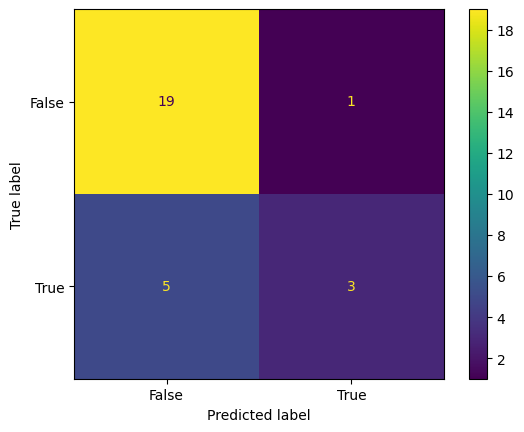

In [19]:
# confusion matrix for test predictions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

cm = ConfusionMatrixDisplay.from_estimator(
    lr,
    X_test,
    y_test,
    values_format="d"
)

# Discussion

- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?

Ideas
- Talk about the probability predictions for the logistric regression, the confidence of the model prediction
- Talk about the confusion matrix
    - it would be ideal if the each class would represent roughly 50–50% of the samples
    - our data is somewhat imbalanced, it is not severe so we didn't make adjustments
- Discuss the overall result using the two models
- What other ways can we optimize the current model
    - hyperparameter tuning
    - using `class_weight` to balance dataset
- What other models can we consider in the future
...

# References

- UBC Master of Data Science Program. DSCI 531: Effective use of Visual Channels– Lecture 2: Bar Chart syntax. 2025.
- UBC Master of Data Science Program. DSCI 531: Visualization for communication– Lecture 5: axis label formatting. 2025.
- W3Schools. CSS Color Names. W3Schools.com. https://www.w3schools.com/cssref/css_colors.php (accessed 21 November 2025).

at least 4 citations relevant to the project (format is your choose, just be consistent across the references).

# Note:
- Make sure to render to PDF form and push to GitHub.
- Everyone should contribute equally to the code and writing!
- Git commit messages should be meaningful; they will be marked!
- Use GitHub issues to assign tasks and communicate!
- Proper grammar and full sentences in README